# DATA VISUALIZATION - TERM PROJECT

### Anıl Dervişoğlu - 150220344
### Ömer Faruk Zeybek - 150220743

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Define custom settings
COLOR = "#7a8cc3"
BACKGROUND_COLOR = "#6577b3"
EDGECOLOR = 'black'
FIGSIZE = (10, 6)
FONTSIZE = 12
TITLE_FONTSIZE = 20
LABEL_FONTSIZE = 16

# Apply custom settings to matplotlib
plt.rcParams['axes.facecolor'] = COLOR
plt.rcParams['figure.facecolor'] = BACKGROUND_COLOR
plt.rcParams['axes.edgecolor'] = EDGECOLOR
plt.rcParams['figure.figsize'] = FIGSIZE
plt.rcParams['axes.titlesize'] = TITLE_FONTSIZE
plt.rcParams['axes.labelsize'] = LABEL_FONTSIZE
plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

# Define colors for text elements
TEXT_COLOR = 'white'
LABEL_COLOR = 'lightgray'
XTICK_COLOR = 'powderblue'
YTICK_COLOR = 'powderblue'
TITLE_COLOR = 'white'
POINT_COLOR = '#bbbbff'

# Apply colors to matplotlib
plt.rcParams['text.color'] = TEXT_COLOR
plt.rcParams['axes.labelcolor'] = LABEL_COLOR
plt.rcParams['xtick.color'] = XTICK_COLOR
plt.rcParams['ytick.color'] = YTICK_COLOR
plt.rcParams['axes.titlecolor'] = TITLE_COLOR

# Set padding for title and labels
plt.rcParams['axes.titlepad'] = 20  # Title padding
plt.rcParams['axes.labelpad'] = 15  # Label padding

# Make the title bold
plt.rcParams['axes.titleweight'] = 'bold'

In [2]:
# Read the data from the CSV file
data = pd.read_csv('f_data.csv')

# Display the first few rows of the dataframe
data.head()

/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_52975/2239130167.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('f_data.csv')


,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


In [3]:
# Filter the data to include only rows where the year is greater than or equal to 2000
data = data[data['year'] >= 2000]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132286 entries, 0 to 6132285
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   year             int64  
 2   comm_code        object 
 3   commodity        object 
 4   flow             object 
 5   trade_usd        int64  
 6   weight_kg        float64
 7   quantity_name    object 
 8   quantity         float64
 9   category         object 
dtypes: float64(2), int64(2), object(6)
memory usage: 467.9+ MB


## Data Cleaning

In [5]:
# Count the number of NaN values in each column
nan_counts = data.isna().sum()

# Convert the Series to a DataFrame
nan_counts_df = nan_counts.reset_index()
nan_counts_df.columns = ['Column', 'NaN Count']

# Display the DataFrame
nan_counts_df

,Column,NaN Count
0,country_or_area,0
1,year,0
2,comm_code,0
3,commodity,0
4,flow,0
5,trade_usd,0
6,weight_kg,126155
7,quantity_name,0
8,quantity,302491
9,category,0


In [6]:
# Drop rows with NaN values
data.dropna(inplace=True)

# Display the first few rows of the cleaned dataframe
data.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


## Data Analysis

Number of unique country names: 198


/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_52975/778379758.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette=list(reversed(sns.color_palette('Blues', n_colors=15))), edgecolor=EDGECOLOR)
/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_52975/778379758.py:11: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  sns.barplot(x=top_countries.values, y=top_countries.index, palette=list(reversed(sns.color_palette('Blues', n_colors=15))), edgecolor=EDGECOLOR)


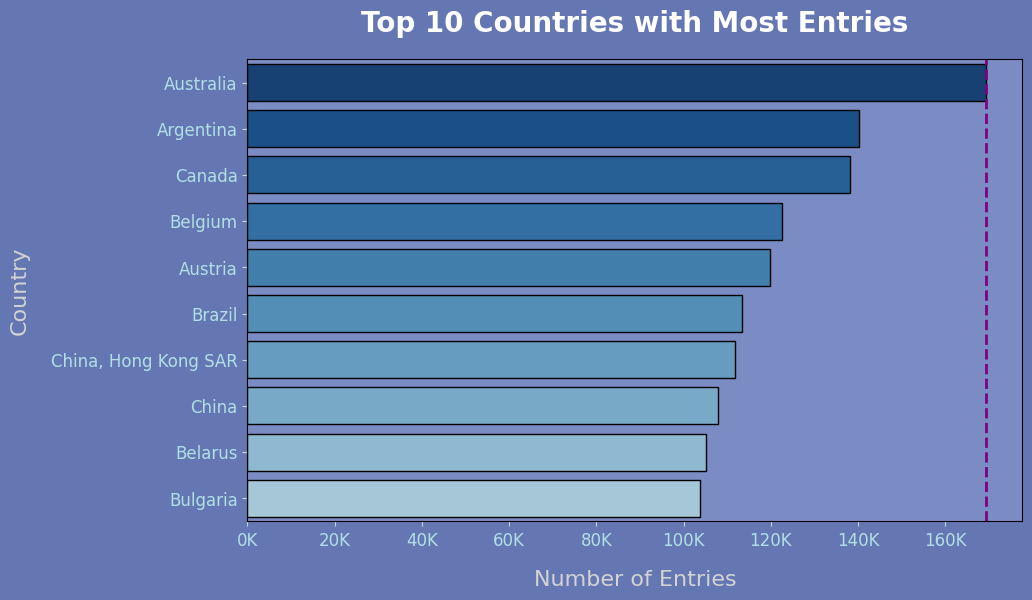

,value
country,
Australia,169205
Argentina,140300
Canada,138165
Belgium,122494
Austria,119799
...,...
Solomon Isds,682
Afghanistan,565
Iraq,441


In [7]:
# Rename the column and calculate unique countries
data.rename(columns={'country_or_area': 'country'}, inplace=True)
unique_countries = data['country'].nunique()
print(f"Number of unique country names: {unique_countries}")

# Get the top 15 countries with the most entries
top_countries = data['country'].value_counts().head(10)
top_countries_all = data['country'].value_counts()

# Plot the data
sns.barplot(x=top_countries.values, y=top_countries.index, palette=list(reversed(sns.color_palette('Blues', n_colors=15))), edgecolor=EDGECOLOR)
plt.title('Top 10 Countries with Most Entries', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
plt.xlabel('Number of Entries', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
plt.ylabel('Country', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)

# Format the x-axis labels to show multiples of 1000 as K
formatter = FuncFormatter(lambda x, pos: f'{int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(formatter)

# Add red lines for minimum and maximum count values
max_count = top_countries_all.max()
plt.axvline(max_count, color='purple', linestyle='--', linewidth=2)

plt.show()

# Show statistics on value counts for countries
country_stats = top_countries_all.describe()
country_stats_df = top_countries_all.to_frame(name='value')
country_stats_df

In [8]:
unique_countries_list = data['country'].unique()
print(unique_countries_list)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Rep.'
 'Chile' 'China' 'China, Hong Kong SAR' 'China, Macao SAR' 'Colombia'
 'Comoros' 'Congo' 'Cook Isds' 'Costa Rica' "Côte d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Rep.' 'Denmark' 'Dominica' 'Dominican Rep.'
 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia' 'Ethiopia' 'EU-28'
 'Faeroe Isds' 'Fiji' 'Finland' 'Fmr Sudan' 'France' 'French Polynesia'
 'FS Micronesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'

In [9]:
# We specifiically left the "EU-28" data in the list as it has too much of an importance in the data

# Replace country names
data['country'] = data['country'].replace({"Fmr Sudan": "Sudan", "Lao People's Dem. Rep.": "Laos", "FS Micronesia": "Federated States of Micronesia"})

# Delete rows with specific country names
data = data[~data['country'].isin(['Other Asia, nes'])]

# Display the first few rows of the updated dataframe
data.head()

,country,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


Year range: 2000 - 2016


/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_52975/1613996309.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rows_per_year.index, y=rows_per_year.values, palette='Blues', edgecolor=EDGECOLOR)


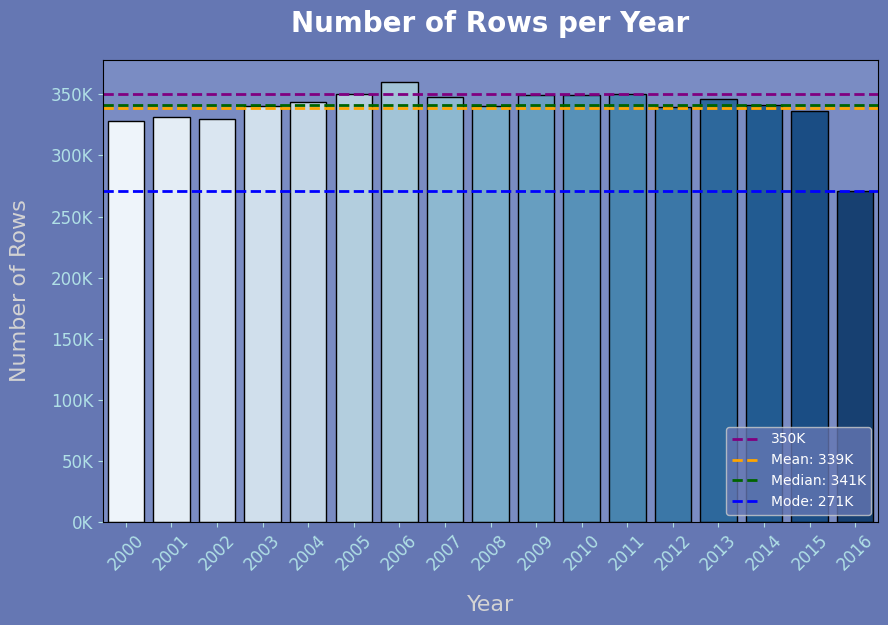

In [10]:
year_min = data['year'].min()
year_max = data['year'].max()
print(f"Year range: {year_min} - {year_max}")

# Calculate the number of rows for each year
rows_per_year = data['year'].value_counts().sort_index()

# Calculate mean, median, and mode
mean_rows = rows_per_year.mean()
median_rows = rows_per_year.median()
mode_rows = rows_per_year.mode()[0]

# Plot the number of rows for each year
plt.figure(figsize=FIGSIZE)
sns.barplot(x=rows_per_year.index, y=rows_per_year.values, palette='Blues', edgecolor=EDGECOLOR)
plt.title('Number of Rows per Year', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
plt.xlabel('Year', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
plt.ylabel('Number of Rows', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
plt.xticks(rotation=45)

# Draw a line at 350K
plt.axhline(350000, color='purple', linestyle='--', linewidth=2, label='350K')

# Draw horizontal lines for mean, median, and mode
plt.axhline(mean_rows, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_rows / 1000:.0f}K')
plt.axhline(median_rows, color='darkgreen', linestyle='--', linewidth=2, label=f'Median: {median_rows / 1000:.0f}K')
plt.axhline(mode_rows, color='blue', linestyle='--', linewidth=2, label=f'Mode: {mode_rows / 1000:.0f}K')

# Format the y-axis labels to show multiples of 1000 as K
formatter = FuncFormatter(lambda x, pos: f'{int(x/1000)}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(facecolor=BACKGROUND_COLOR, loc='lower right')
plt.show()

In [11]:
# Get the unique comm_code, commodity, and category pairs
unique_pairs = data[['comm_code', 'commodity', 'category']].drop_duplicates()

# Show the number of unique pairs
num_unique_pairs = unique_pairs.shape[0]
print(f"Number of unique comm_code, commodity, and category pairs: {num_unique_pairs}")

# Display some examples of the unique pairs
unique_pairs.head()

Number of unique comm_code, commodity, and category pairs: 5039


,comm_code,commodity,category
0,10410,"Sheep, live",01_live_animals
1,10420,"Goats, live",01_live_animals
2,10210,"Bovine animals, live pure-bred breeding",01_live_animals
3,10290,"Bovine animals, live, except pure-bred breeding",01_live_animals
4,10392,"Swine, live except pure-bred breeding > 50 kg",01_live_animals


In [12]:
data.drop(columns=['comm_code', 'commodity'], inplace=True)

Number of unique categories: 98
Percentage of points less than 60000: 30.93%
Percentage of points less than 80000: 100.00%


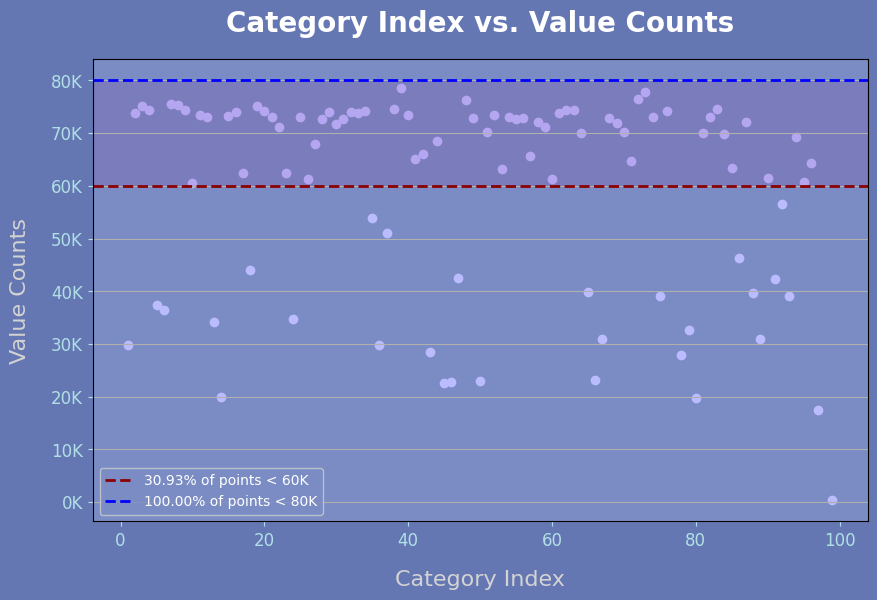

In [13]:
# Calculate the number of unique categories
unique_categories = data['category'].nunique()
print(f"Number of unique categories: {unique_categories}")

# Get the count of each category, excluding 'all_commodities'
category_counts = data[data['category'] != 'all_commodities']['category'].value_counts()

# Create a dataframe with unique categories and their counts
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['category', 'count']
category_counts_df = category_counts_df.sort_values(by='count', ascending=False)

# Display the dataframe
category_counts_df.head()

# Extract the first part of the category name and convert it to integers
category_counts_df['category_index'] = category_counts_df['category'].apply(lambda x: int(x.split('_')[0]))

# Calculate the percentage of points less than 60000
percent_less_than_70000 = (category_counts_df['count'] < 60000).mean() * 100
print(f"Percentage of points less than 60000: {percent_less_than_70000:.2f}%")

# Calculate the percentage of points less than 80000
percent_less_than_80000 = (category_counts_df['count'] < 80000).mean() * 100
print(f"Percentage of points less than 80000: {percent_less_than_80000:.2f}%")

plt.figure(figsize=FIGSIZE)
plt.scatter(category_counts_df['category_index'], category_counts_df['count'], marker='o', color=POINT_COLOR)
plt.title('Category Index vs. Value Counts', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
plt.xlabel('Category Index', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
plt.ylabel('Value Counts', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
plt.grid(axis='y')  # Show only y gridlines

# Highlight the range between 60,000 and 80,000 with a purple rectangle
plt.axhspan(60000, 80000, color='purple', alpha=0.11)

# Draw a line at 60000 with a legend
plt.axhline(60000, color='darkred', linestyle='--', linewidth=2, label=f'{percent_less_than_70000:.2f}% of points < 60K')

# Draw a line at 80000 with a legend
plt.axhline(80000, color='blue', linestyle='--', linewidth=2, label=f'{percent_less_than_80000:.2f}% of points < 80K')

plt.legend()

# Format the y-axis labels to show multiples of 1000 as K
formatter = FuncFormatter(lambda x, pos: f'{int(x/1000)}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


Unique types of flow: ['Export' 'Import' 'Re-Export' 'Re-Import']
Percentages of each flow type:


,flow,percentage
0,Import,58.956037
1,Export,34.203856
2,Re-Export,4.351916
3,Re-Import,2.488191


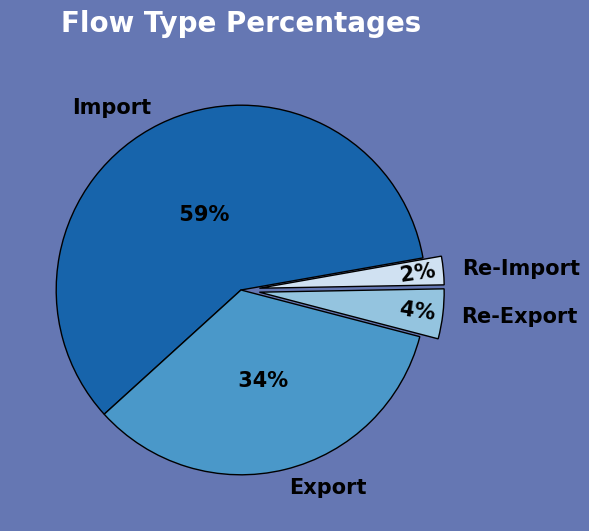

In [14]:
unique_flows = data['flow'].unique()
print(f"Unique types of flow: {unique_flows}")

# Calculate the percentages of each flow type
flow_percentages = data['flow'].value_counts(normalize=True) * 100
print("Percentages of each flow type:")

# Convert the percentages to a dataframe
flow_percentages_df = flow_percentages.reset_index()
flow_percentages_df.columns = ['flow', 'percentage']

# Display the dataframe
display(flow_percentages_df)

# Define the explode values
explode = (0, 0, 0.1, 0.1)  # Adjust the values to explode the slices

# Custom function to format the percentages with increased font size
def autopct_format(pct, allvalues):
    absolute = int(np.round(pct/100.*np.sum(allvalues)))
    return f' {pct:.0f}% ' if pct > 0 else ''

# Plot the flow percentages as a pie chart
plt.figure(figsize=FIGSIZE)
wedges, texts, autotexts = plt.pie(flow_percentages, labels=flow_percentages.index, autopct=lambda pct: autopct_format(pct, flow_percentages), startangle=10, 
    colors=list(reversed(sns.color_palette('Blues', len(flow_percentages)))), 
    textprops={'color': 'black', 'fontsize': FONTSIZE + 3, 'fontweight': 'bold'}, explode=explode, wedgeprops={'edgecolor': EDGECOLOR})

# Adjust the position of the "Re-Import" and "Re-Export" labels
for i, text in enumerate(autotexts):
    if flow_percentages.index[i] == 'Re-Import':
        text.set_rotation(8)
        text.set_verticalalignment('center')
    elif flow_percentages.index[i] == 'Re-Export':
        text.set_rotation(-8)
        text.set_verticalalignment('center')

first_change = 20/24
second_change = 33/24
autotexts[0].set_position((first_change / 1.1 * autotexts[0].get_position()[0], first_change / 1.1 * autotexts[0].get_position()[1]))
autotexts[1].set_position((first_change * autotexts[1].get_position()[0], first_change * autotexts[1].get_position()[1]))
autotexts[2].set_position((second_change * autotexts[2].get_position()[0], second_change * autotexts[2].get_position()[1]))
autotexts[3].set_position((second_change * autotexts[3].get_position()[0], second_change * autotexts[3].get_position()[1]))

plt.title('Flow Type Percentages', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
plt.show()

In [15]:
# Replace 'Re-Export' with 'Export' and 'Re-Import' with 'Import'
data['flow'] = data['flow'].replace({'Re-Export': 'Export', 'Re-Import': 'Import'})

In [16]:
# list of numerical features
trade_weight_quantity = ['trade_usd', 'weight_kg', 'quantity']

for feature in trade_weight_quantity:
    print(f"Range of {feature}: {data[feature].min()} - {data[feature].max()}")

Range of trade_usd: 1 - 436949169670
Range of weight_kg: 0.0 - 1013604763005.0
Range of quantity: 0.0 - 60873365597449.0


In [17]:
data[trade_weight_quantity].describe()

,trade_usd,weight_kg,quantity
count,5.757234e+06,5.757234e+06,5.757234e+06
mean,2.497858e+07,3.873553e+07,5.277210e+07
std,7.333057e+08,2.491619e+09,2.566413e+10
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.061600e+04,1.536000e+03,1.139000e+03
50%,1.543845e+05,3.243200e+04,2.782650e+04
75%,2.004598e+06,5.250205e+05,4.842468e+05
max,4.369492e+11,1.013605e+12,6.087337e+13


Number of outliers for trade_usd: 1012751
Number of outliers for weight_kg: 1053310
Number of outliers for quantity: 1058494


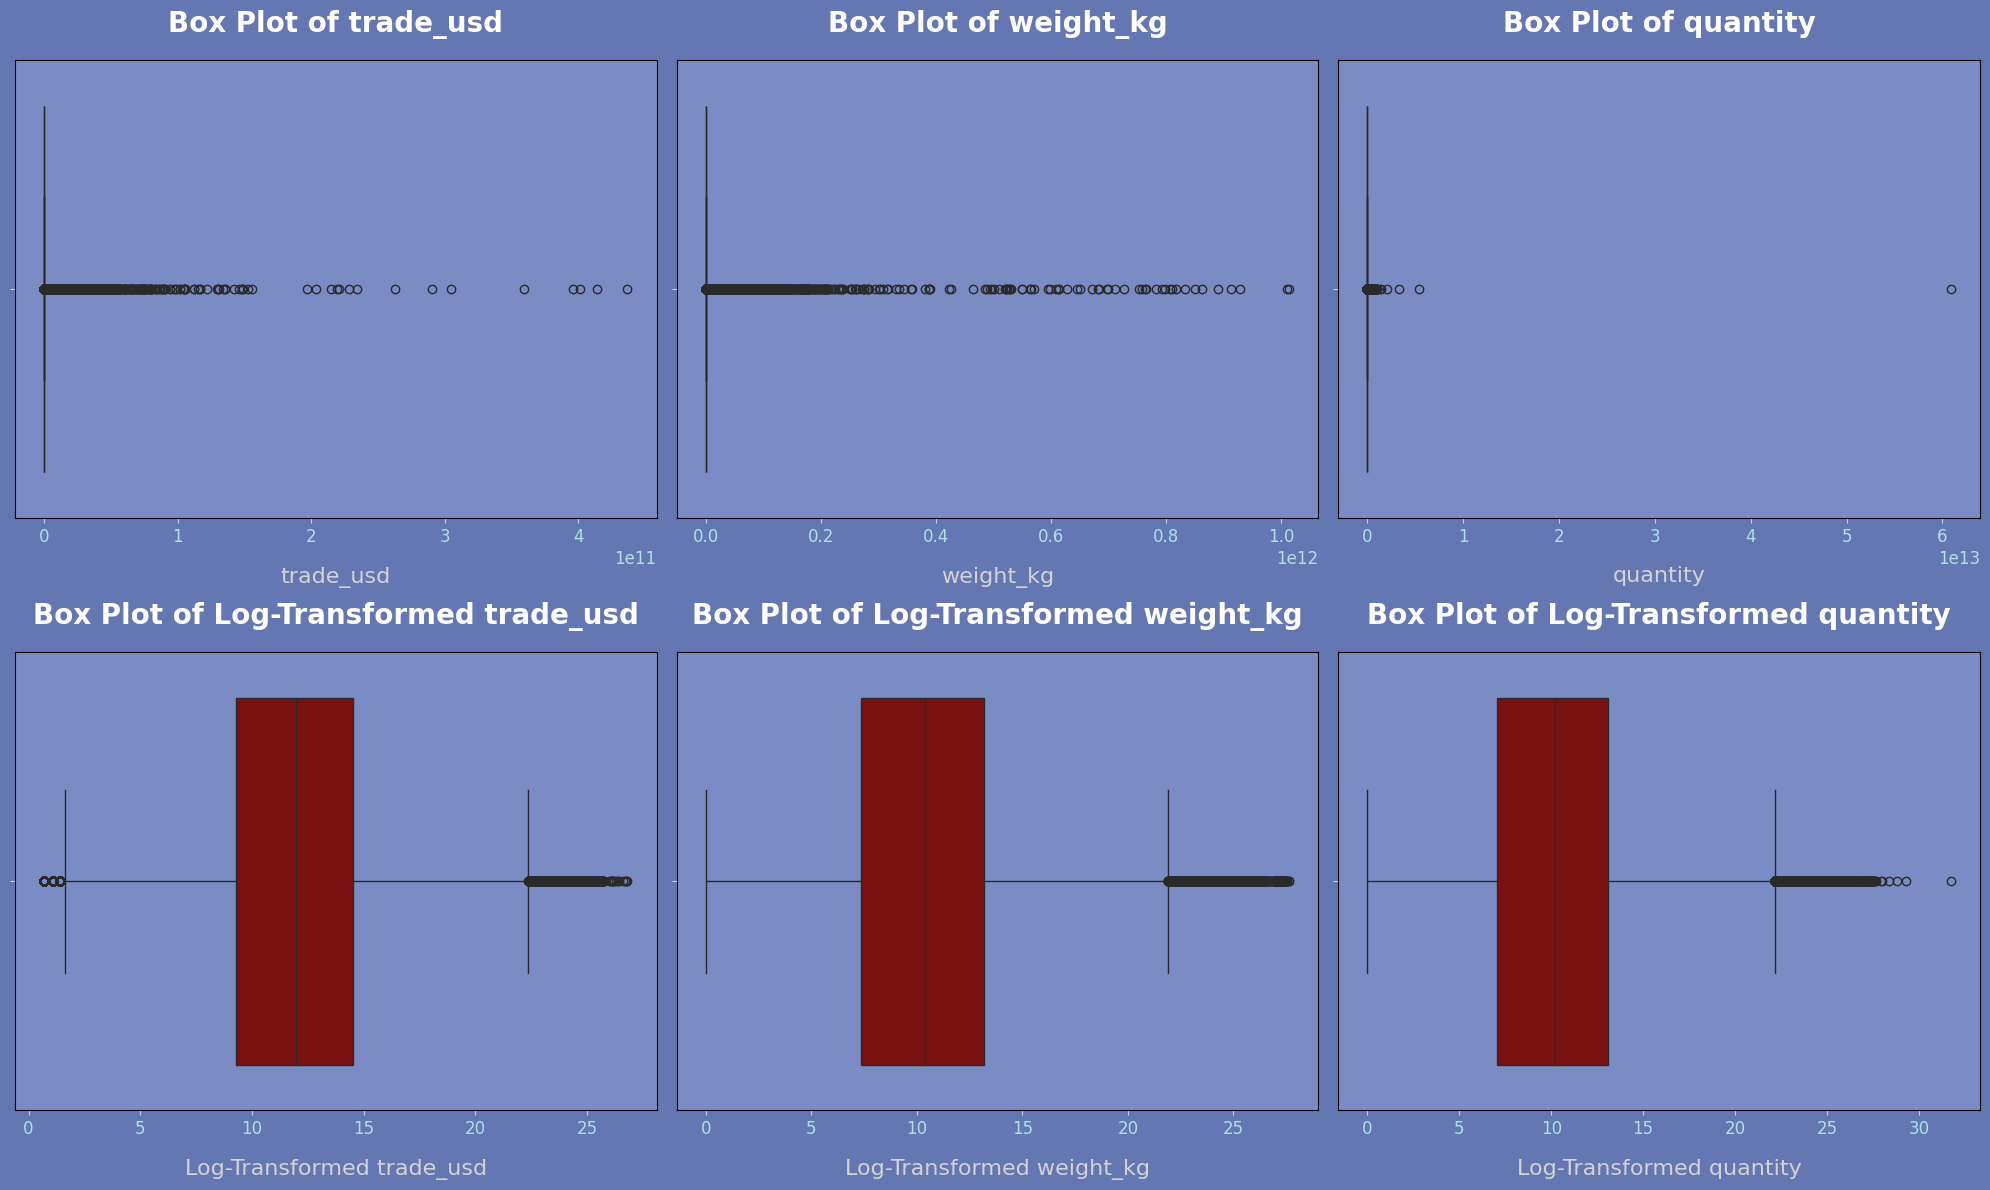

In [18]:
# Log-transform the features
for i, feature in enumerate(trade_weight_quantity):
    data['log_' + feature] = np.log(data[feature] + 1)


# Create subplots for normal and log-transformed box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i, feature in enumerate(trade_weight_quantity):
    # Calculate the IQR (Interquartile Range)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    print(f"Number of outliers for {feature}: {outliers.shape[0]}")

    # Normal box plot
    sns.boxplot(x=feature, data=data, color='darkred', ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {feature}', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
    axes[0, i].set_xlabel(feature, fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)

    # Log-transformed box plot
    sns.boxplot(x='log_' + feature, data=data, color='darkred', ax=axes[1, i])
    axes[1, i].set_title(f'Box Plot of Log-Transformed {feature}', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
    axes[1, i].set_xlabel(f'Log-Transformed {feature}', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)

# Show the plots
plt.tight_layout()
plt.show()

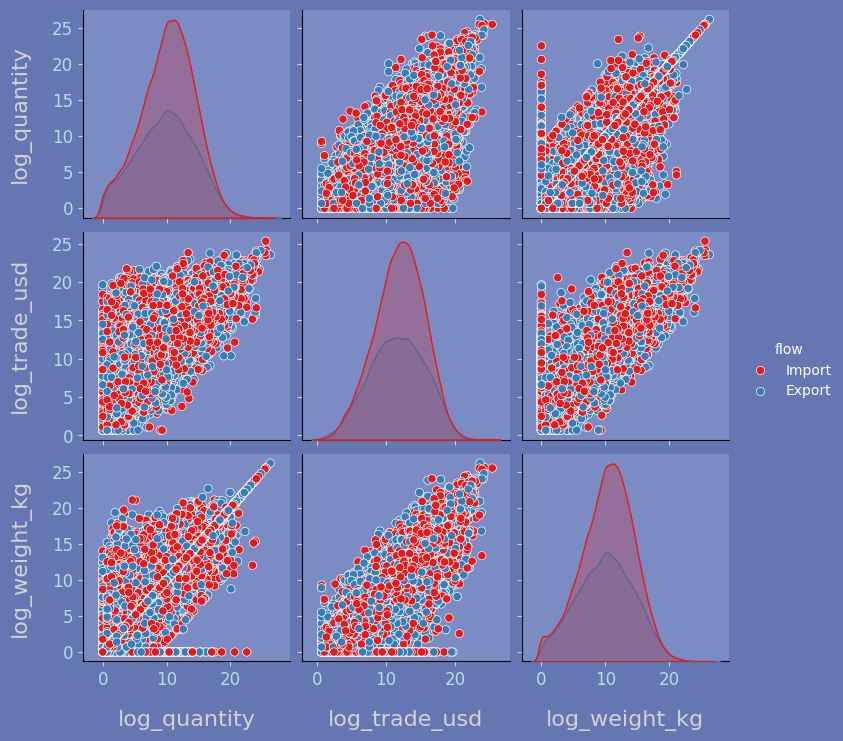

In [19]:
# Filter the data to include only 'Import' and 'Export' flows
filtered_data = data[data['flow'].isin(['Import', 'Export'])]

# take a sample for faster processing
filtered_data = filtered_data.sample(100000)

# Create the pair plot with logarithmic scaling
sns.pairplot(filtered_data, hue='flow', vars=['log_quantity', 'log_trade_usd', 'log_weight_kg'], palette='Set1')

# Show the plot
plt.show()

In [20]:
quantity_name_counts = data['quantity_name'].value_counts()
quantity_name_counts_df = quantity_name_counts.reset_index()
quantity_name_counts_df.columns = ['Quantity Name', 'Count']
display(quantity_name_counts_df)

# Change quantity name "Electrical energy in thousands of kilowatt-hours" to "Electrical energy"
data['quantity_name'] = data['quantity_name'].replace('Electrical energy in thousands of kilowatt-hours', 'Electrical energy')

# # Drop rows with specific quantity names
# data = data[~data['quantity_name'].isin(['No Quantity', 'Electrical energy in thousands of kilowatt-hours'])]

,Quantity Name,Count
0,Weight in kilograms,4856903
1,Number of items,598954
2,Area in square metres,104237
3,Volume in litres,76149
4,Number of pairs,60914
5,No Quantity,29008
6,Volume in cubic meters,16005
7,Length in metres,8747
8,Weight in carats,3882
9,Thousands of items,1383


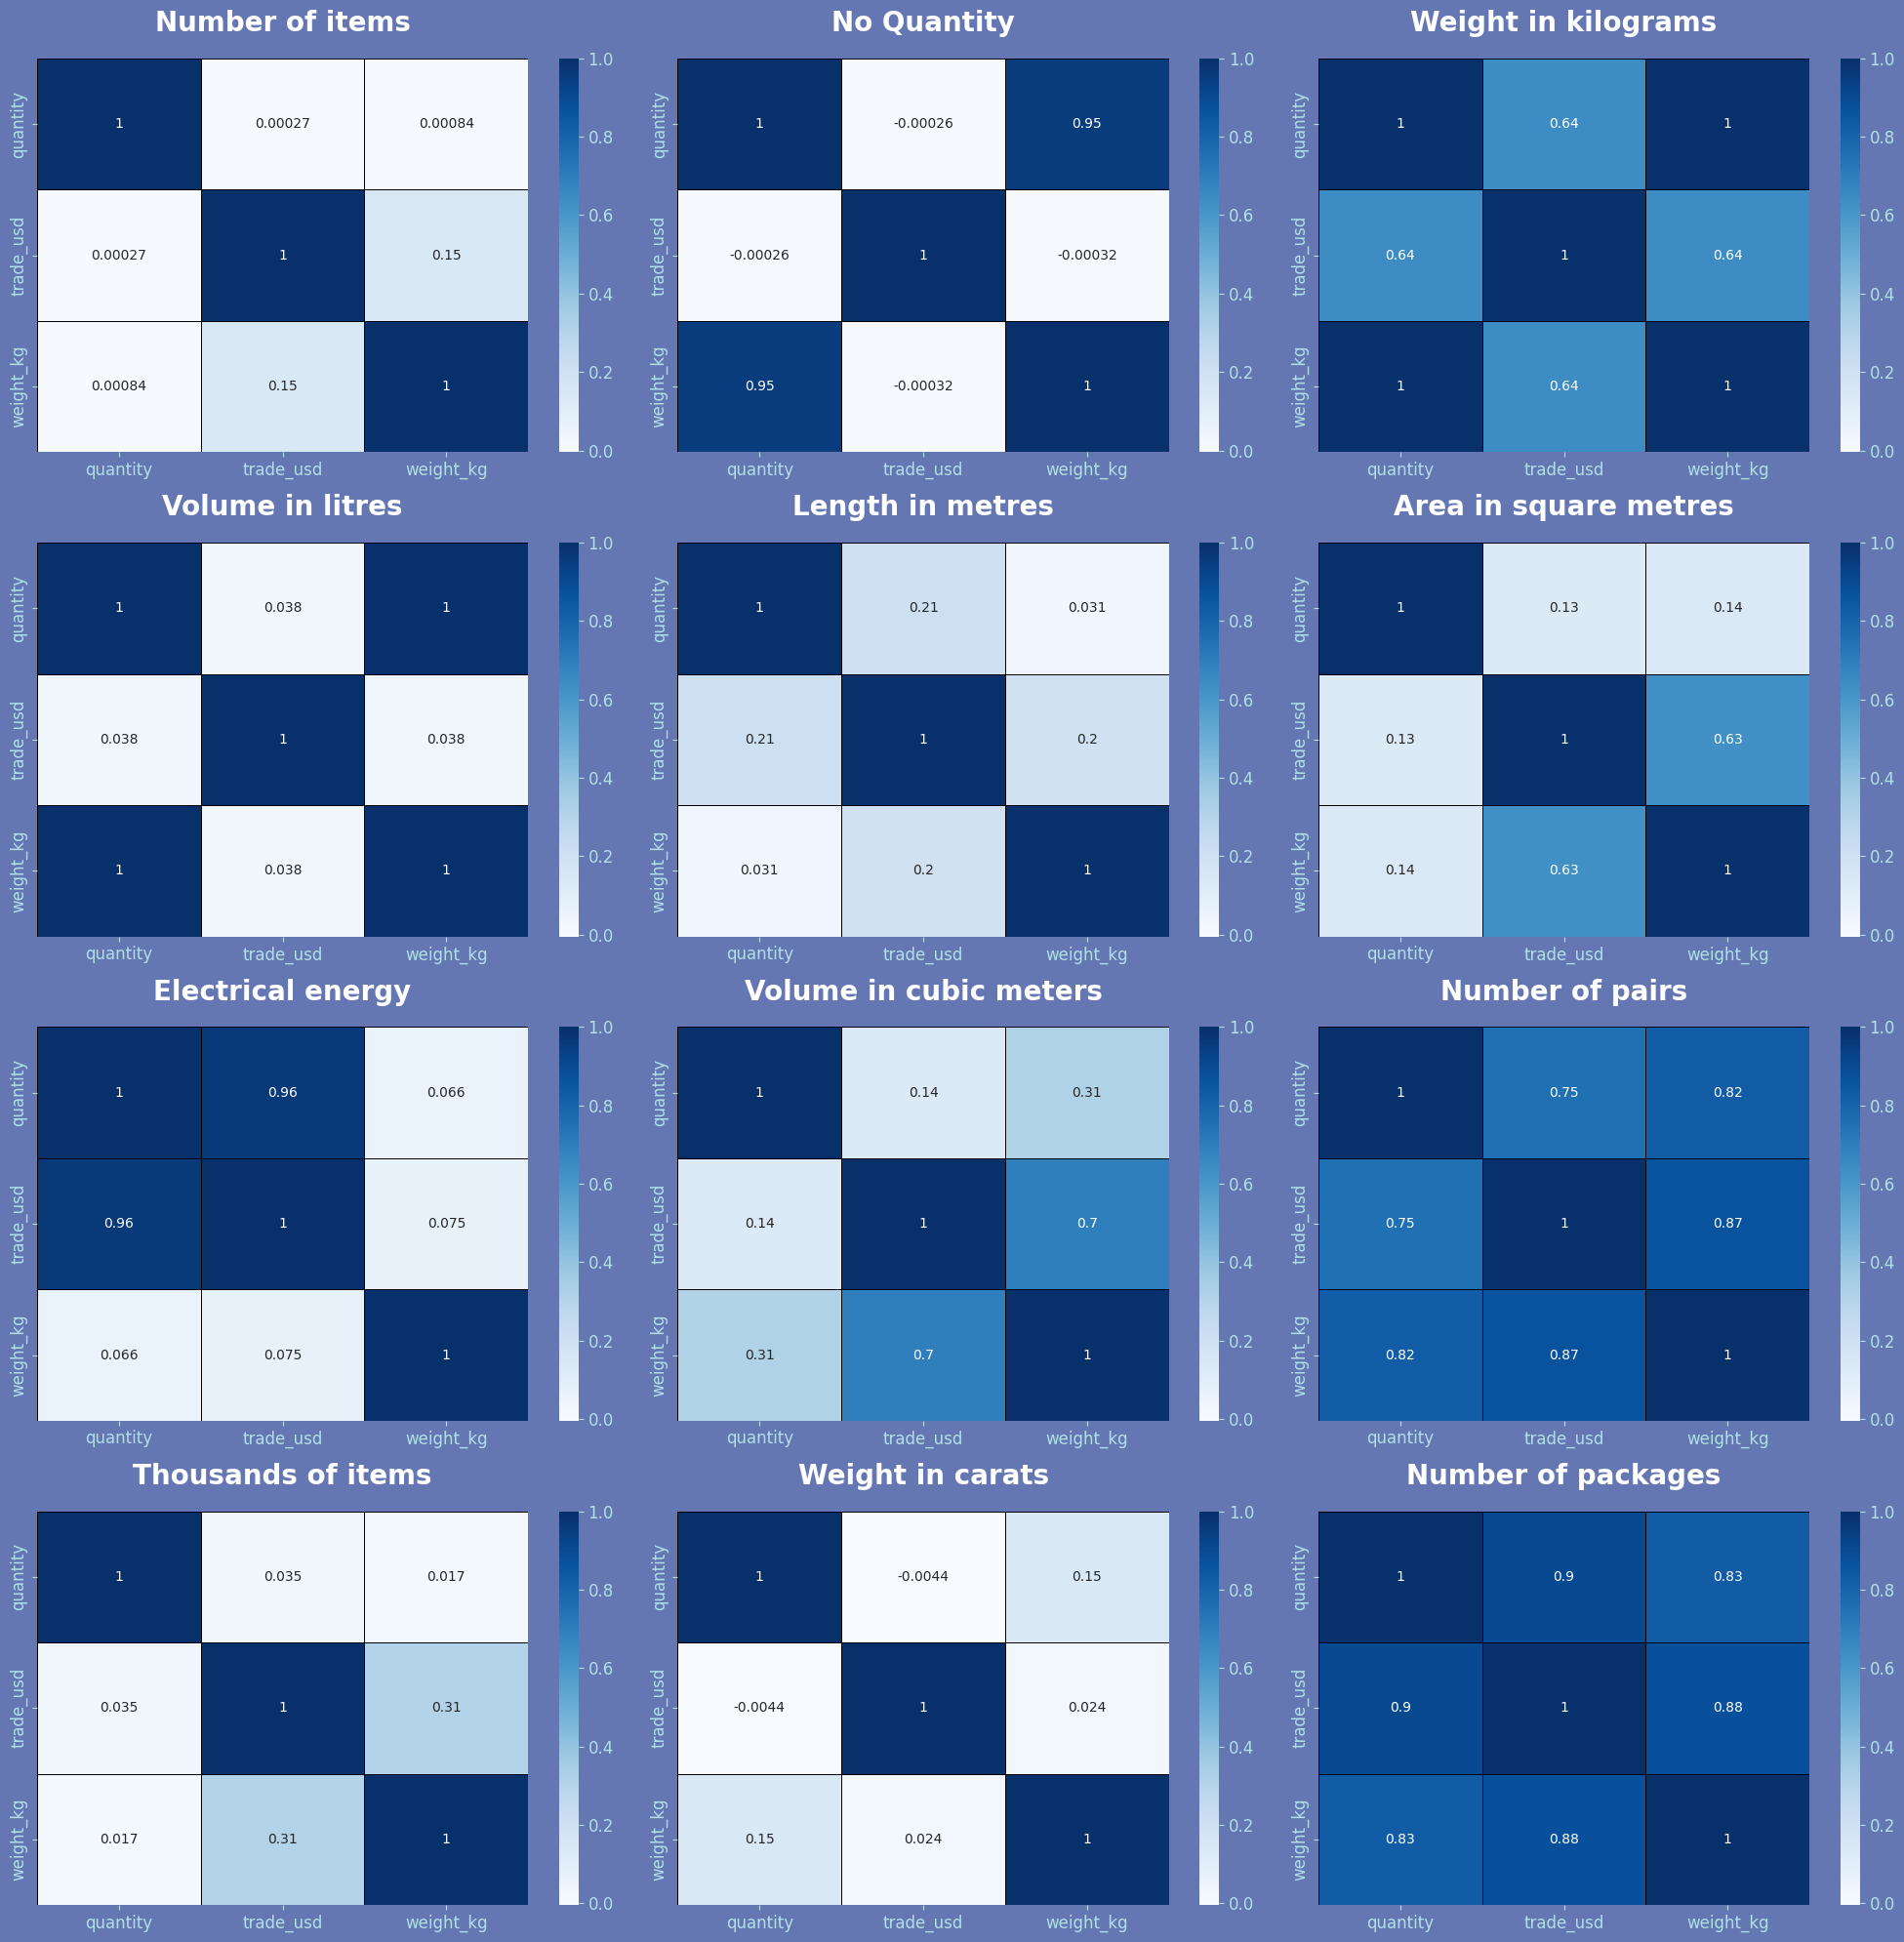

In [21]:
# Get the unique quantity names
unique_quantity_names = data['quantity_name'].unique()

# Create a 4x3 subfigure structure
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

# Initialize vmin and vmax
vmin = float('inf')
vmax = float('-inf')

# First pass to find global min and max correlation values
for quantity_name in unique_quantity_names[:12]:
    filtered_data = data[data['quantity_name'] == quantity_name][['quantity', 'trade_usd', 'weight_kg']]
    corr_matrix = filtered_data.corr()
    vmin = min(vmin, corr_matrix.min().min())
    vmax = max(vmax, corr_matrix.max().max())

# Loop through each unique quantity name and plot the correlation matrix
for i, quantity_name in enumerate(unique_quantity_names[:12]):
    # Filter the data for the current quantity name
    filtered_data = data[data['quantity_name'] == quantity_name][['quantity', 'trade_usd', 'weight_kg']]
    
    # Calculate the correlation matrix
    corr_matrix = filtered_data.corr()
    
    # Plot the correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor=EDGECOLOR, ax=axes[i], vmin=vmin, vmax=vmax)
    axes[i].set_title(f'{quantity_name}', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)

# Adjust layout
plt.tight_layout()
plt.show()

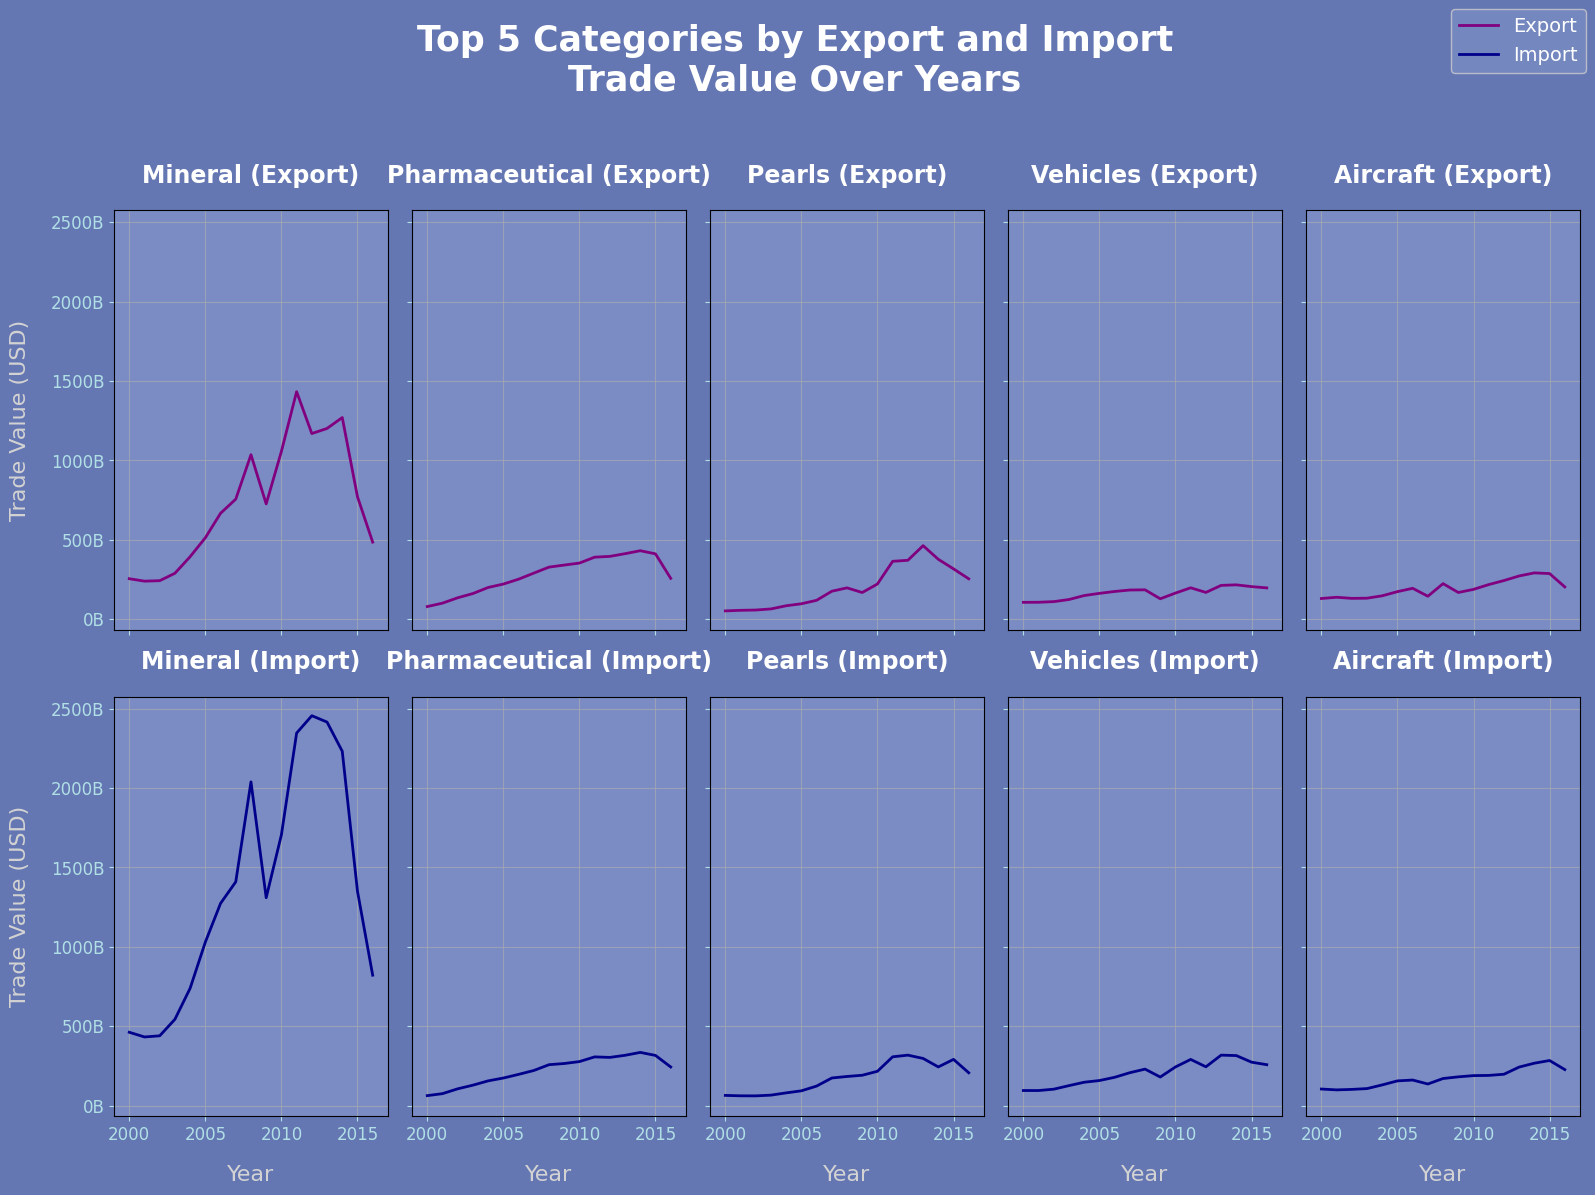

In [22]:
# Filter the data for export flow
export_data = data[data['flow'] == 'Export']

# Calculate the sum of trade_usd values for each category
category_trade_sums_export = export_data.groupby('category')['trade_usd'].sum().reset_index()

# Get the top 5 categories by trade_usd value
top_5_categories_export = category_trade_sums_export.nlargest(5, 'trade_usd')

# Filter the data for the top 5 categories
top_5_data_export = export_data[export_data['category'].isin(top_5_categories_export['category'])]

# Calculate the sum of trade_usd values per year for each of the top 5 categories
top_5_yearly_trade_export = top_5_data_export.groupby(['year', 'category'])['trade_usd'].sum().unstack()

# Filter the data for import flow
import_data = data[data['flow'] == 'Import']

# Calculate the sum of trade_usd values for each category
category_trade_sums_import = import_data.groupby('category')['trade_usd'].sum().reset_index()

# Get the top 5 categories by trade_usd value
top_5_categories_import = category_trade_sums_import.nlargest(5, 'trade_usd')

# Filter the data for the top 5 categories
top_5_data_import = import_data[import_data['category'].isin(top_5_categories_import['category'])]

# Calculate the sum of trade_usd values per year for each of the top 5 categories
top_5_yearly_trade_import = top_5_data_import.groupby(['year', 'category'])['trade_usd'].sum().unstack()

# Plot the data in 2x5 subfigures
fig, axes = plt.subplots(2, 5, figsize=(16, 12), sharey=True, sharex=True)

# Plot export data
for i, category in enumerate(top_5_yearly_trade_export.columns):
    top_5_yearly_trade_export[category].plot(ax=axes[0, i], linewidth=2, color='purple', label='Export') 
    # Extract and capitalize the title
    title = category.split('_')[1].capitalize()
    axes[0, i].set_title(f'{title} (Export)', fontsize=TITLE_FONTSIZE - 3, color=TITLE_COLOR)
    axes[0, i].set_xlabel('Year', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
    axes[0, i].set_ylabel('Trade Value (USD)', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
    axes[0, i].grid(True, alpha=0.6)
    # Format the y-axis labels to show multiples of 1 billion as B
    formatter = FuncFormatter(lambda x, pos: f'{int(x/1e9)}B')
    axes[0, i].yaxis.set_major_formatter(formatter)
    # Set tighter x-axis limits with space on both ends
    axes[0, i].set_xlim(year_min - 1, year_max + 1)

# Plot import data
for i, category in enumerate(top_5_yearly_trade_import.columns):
    top_5_yearly_trade_import[category].plot(ax=axes[1, i], linewidth=2, color='darkblue', label='Import') 
    # Extract and capitalize the title
    title = category.split('_')[1].capitalize()
    axes[1, i].set_title(f'{title} (Import)', fontsize=TITLE_FONTSIZE - 3, color=TITLE_COLOR)
    axes[1, i].set_xlabel('Year', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
    axes[1, i].set_ylabel('Trade Value (USD)', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
    axes[1, i].grid(True, alpha=0.6)
    # Format the y-axis labels to show multiples of 1 billion as B
    formatter = FuncFormatter(lambda x, pos: f'{int(x/1e9)}B')
    axes[1, i].yaxis.set_major_formatter(formatter)
    # Set tighter x-axis limits with space on both ends
    axes[1, i].set_xlim(year_min - 1, year_max + 1)

# Add a general title for the entire figure
fig.suptitle('Top 5 Categories by Export and Import\nTrade Value Over Years', fontsize=TITLE_FONTSIZE + 5, color=TITLE_COLOR, fontweight='bold')

# Add a single legend to the top right of the figure
handles_export, labels_export = axes[0, 0].get_legend_handles_labels()
handles_import, labels_import = axes[1, 0].get_legend_handles_labels()
handles = handles_export + handles_import
labels = labels_export + labels_import
fig.legend(handles, labels, loc='upper right', fontsize=FONTSIZE + 2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


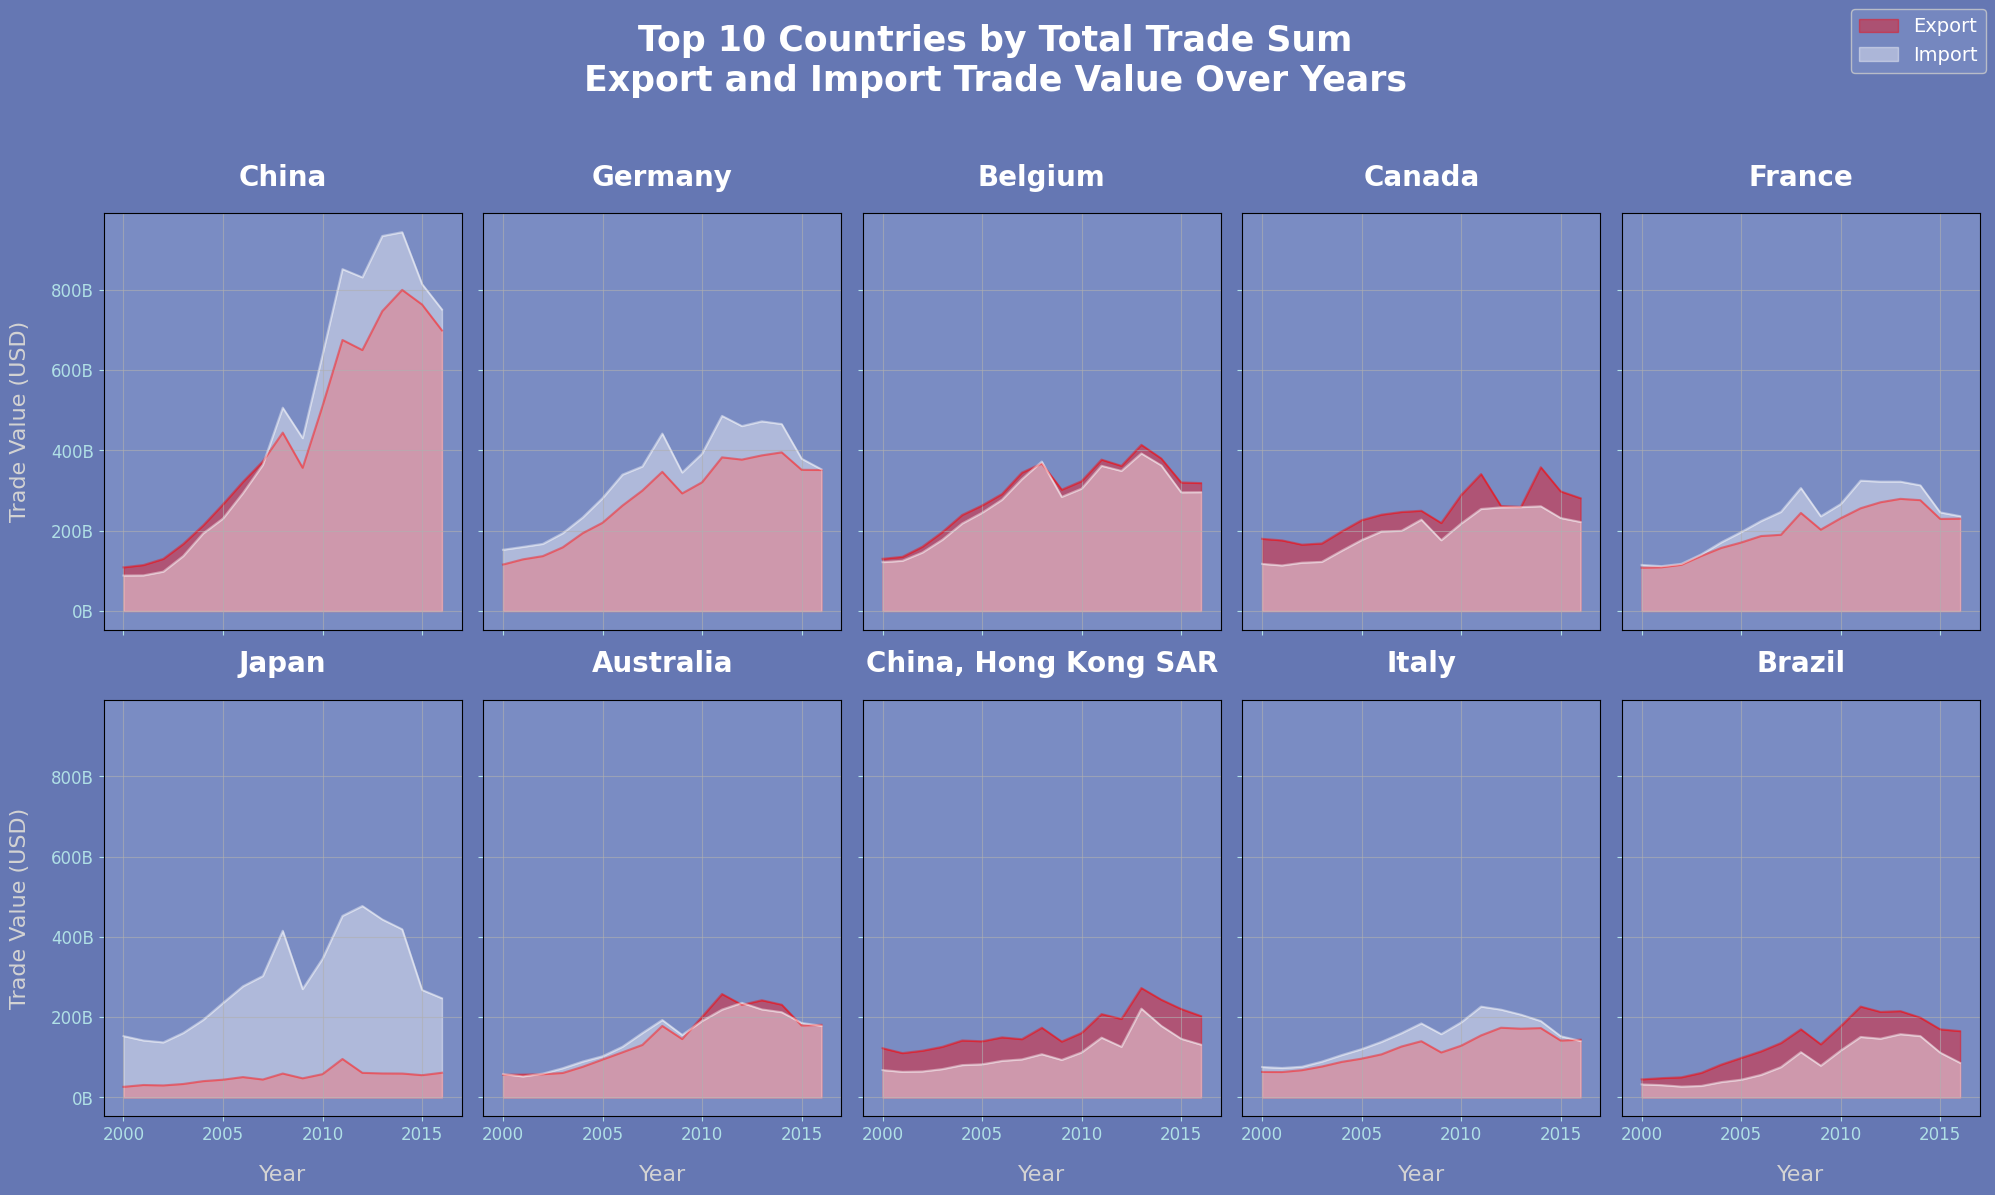

In [23]:
# Calculate the total trade sum for each country
country_trade_sums = data.groupby('country')['trade_usd'].sum().reset_index()

# Get the top 10 countries with the largest total trade sum, excluding 'EU-28'
top_10_countries = country_trade_sums[country_trade_sums['country'] != 'EU-28'].nlargest(10, 'trade_usd')['country']

# Filter the data for the top 10 countries
top_10_countries_data = data[data['country'].isin(top_10_countries)]

# Create a 2x5 subplot
fig, axes = plt.subplots(2, 5, figsize=(20, 12), sharey=True, sharex=True)

# Plot the data for each country
for i, country in enumerate(top_10_countries):
    country_data = top_10_countries_data[top_10_countries_data['country'] == country]
    
    # Calculate the total sum of exports and imports for each year
    yearly_trade_sum = country_data.groupby(['year', 'flow'])['trade_usd'].sum().unstack().fillna(0)
    
    # Create area plots for exports and imports
    yearly_trade_sum.plot(kind='area', stacked=False, ax=axes[i // 5, i % 5], color=['red', 'white'], alpha=0.4, legend=False)
    
    # Set the title and labels
    axes[i // 5, i % 5].set_title(country, fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
    axes[i // 5, i % 5].set_xlabel('Year', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
    axes[i // 5, i % 5].set_ylabel('Trade Value (USD)', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
    axes[i // 5, i % 5].grid(True, alpha=0.6)
    
    # Format the y-axis labels to show multiples of 1 billion as B
    formatter = FuncFormatter(lambda x, pos: f'{int(x/1e9)}B')
    axes[i // 5, i % 5].yaxis.set_major_formatter(formatter)
    
    # Set tighter x-axis limits with space on both ends
    axes[i // 5, i % 5].set_xlim(year_min - 1, year_max + 1)

# Add a general title for the entire figure
fig.suptitle('Top 10 Countries by Total Trade Sum\nExport and Import Trade Value Over Years', fontsize=TITLE_FONTSIZE + 5, color=TITLE_COLOR, fontweight='bold')

# Add a single legend to the top right subplot
handles, labels = axes[0, 4].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=FONTSIZE + 2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_52975/3578208931.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biggest_exports = top_10_countries_data[top_10_countries_data['flow'] == 'Export'].groupby('country').apply(lambda x: x.loc[x['trade_usd'].idxmax()])
/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_52975/3578208931.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  big

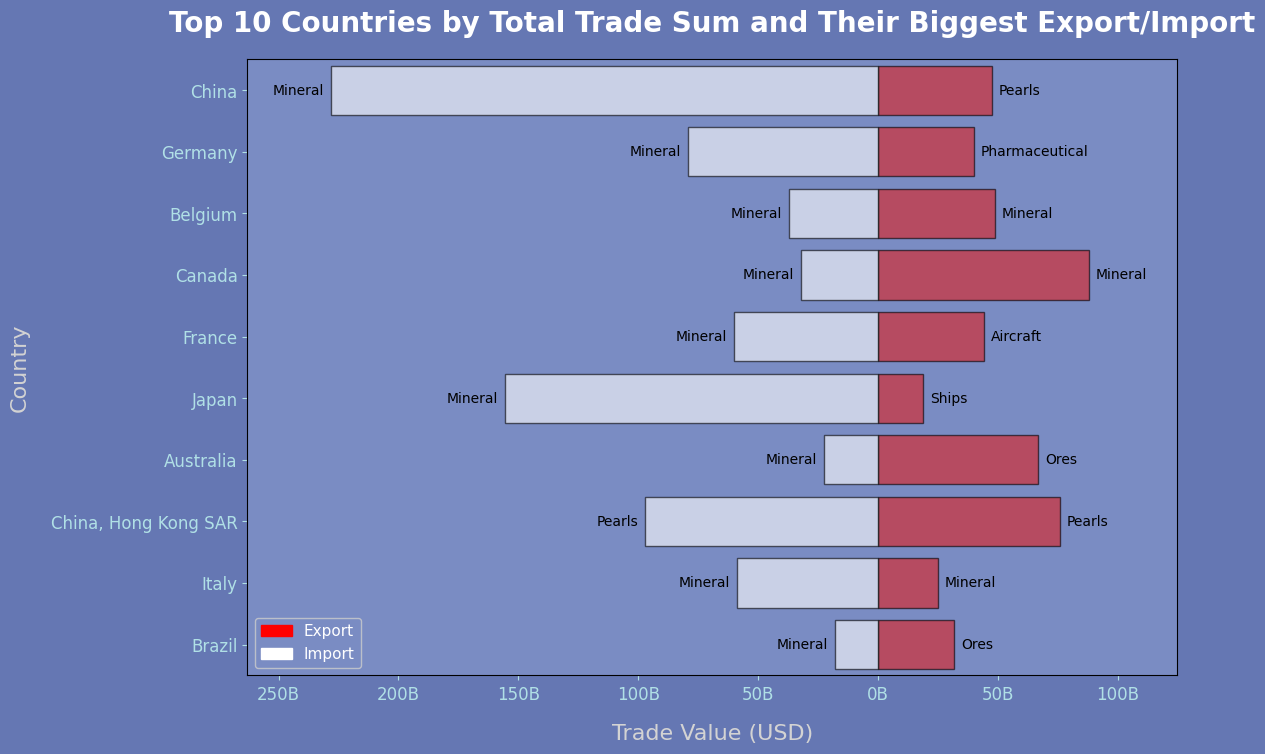

In [24]:
# Get the top 10 countries with the largest total trade sum, excluding 'EU-28'
top_10_countries_trade_sum = country_trade_sums[country_trade_sums['country'] != 'EU-28'].nlargest(10, 'trade_usd')

# Filter the data for the top 10 countries
top_10_countries_data = data[data['country'].isin(top_10_countries_trade_sum['country'])]

# Find the biggest export in any category for each of the top 10 countries
biggest_exports = top_10_countries_data[top_10_countries_data['flow'] == 'Export'].groupby('country').apply(lambda x: x.loc[x['trade_usd'].idxmax()])

# Find the biggest import in any category for each of the top 10 countries
biggest_imports = top_10_countries_data[top_10_countries_data['flow'] == 'Import'].groupby('country').apply(lambda x: x.loc[x['trade_usd'].idxmax()])

# Sort the countries by total trade sum
biggest_exports = biggest_exports.set_index('country').loc[top_10_countries_trade_sum['country']]
biggest_imports = biggest_imports.set_index('country').loc[top_10_countries_trade_sum['country']]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot exports
sns.barplot(x='trade_usd', y=biggest_exports.index, data=biggest_exports, palette=['red'] * len(biggest_exports), edgecolor=EDGECOLOR, alpha=0.6, label='Export')

# Plot imports on the negative side
sns.barplot(x=-biggest_imports['trade_usd'], y=biggest_imports.index, data=biggest_imports, palette=['white'] * len(biggest_imports), edgecolor=EDGECOLOR, alpha=0.6, label='Import')

plt.title('Top 10 Countries by Total Trade Sum and Their Biggest Export/Import', fontsize=TITLE_FONTSIZE, color=TITLE_COLOR)
plt.xlabel('Trade Value (USD)', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)
plt.ylabel('Country', fontsize=LABEL_FONTSIZE, color=LABEL_COLOR)

# Add category names as labels outside the bars for exports
for index, value in enumerate(biggest_exports['trade_usd']):
    category_label = biggest_exports['category'][index].split('_')[1].capitalize()
    plt.annotate(category_label, xy=(value, index), xytext=(5, 0), textcoords='offset points', va='center', ha='left', color='black', fontsize=FONTSIZE - 2)

# Add category names as labels outside the bars for imports
for index, value in enumerate(biggest_imports['trade_usd']):
    category_label = biggest_imports['category'][index].split('_')[1].capitalize()
    plt.annotate(category_label, xy=(-value, index), xytext=(-5, 0), textcoords='offset points', va='center', ha='right', color='black', fontsize=FONTSIZE - 2)

# Format the x-axis labels to show multiples of 1 billion as B
formatter = FuncFormatter(lambda x, pos: f'{int(abs(x)/1e9)}B')
plt.gca().xaxis.set_major_formatter(formatter)

# Set x-axis limits
plt.xlim(-263e9, 125e9)

import matplotlib.patches as mpatches

# Create custom legend patches
export_patch = mpatches.Patch(color='red', label='Export')
import_patch = mpatches.Patch(color='white', label='Import')

# Add the custom legend to the plot with bigger font size
plt.legend(handles=[export_patch, import_patch], loc='lower left', fontsize=FONTSIZE - 1)

plt.show()